<a href="https://colab.research.google.com/github/KeisukeShimokawa/papers-challenge/blob/master/src/cv/CutMix/notebooks/cutmix_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!wget -q https://www.pakutaso.com/shared/img/thumb/AMEMAN17826009_TP_V.jpg -O dog.jpg
!wget -q https://www.pakutaso.com/shared/img/thumb/nekocyan458A5348_TP_V.jpg -O cat.jpg

!ls

AMEMAN17826009_TP_V.jpg  cat.jpg  dog.jpg  sample_data


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch

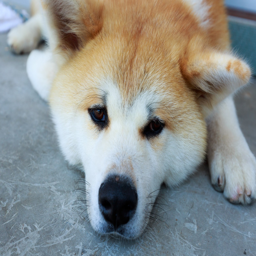

In [17]:
Image.open("dog.jpg").convert("RGB").resize((256,256))

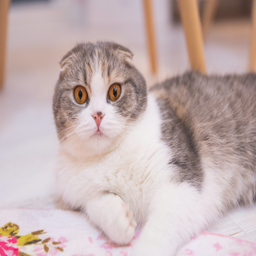

In [18]:
Image.open("cat.jpg").convert("RGB").resize((256,256))

In [43]:
dog = torch.from_numpy(np.asarray(Image.open("dog.jpg")\
                                  .convert("RGB")\
                                  .resize((256, 256)))
                      ).permute(2, 0, 1).unsqueeze(0)
cat = torch.from_numpy(np.asarray(Image.open("cat.jpg")\
                                  .convert("RGB")\
                                  .resize((256, 256)))
                      ).permute(2, 0, 1).unsqueeze(0)

print(dog.shape, cat.shape)

torch.Size([1, 3, 256, 256]) torch.Size([1, 3, 256, 256])


In [44]:
inputs = torch.cat((dog, cat), dim=0)
print(inputs.shape)

targets = torch.cat((torch.ones(1, 1), torch.zeros(1, 1)), dim=0)
print(targets.shape)

torch.Size([2, 3, 256, 256])
torch.Size([2, 1])


In [45]:
lam = np.random.beta(1.0, 1.0)
print(lam)

0.8212395928194913


In [49]:
rand_index = torch.tensor([1, 0], dtype=torch.long)

rand_index

tensor([1, 0])

In [51]:
target_a = targets
target_b = targets[rand_index]

print(target_a)
print(target_b)

tensor([[1.],
        [0.]])
tensor([[0.],
        [1.]])


In [0]:
def rand_bbox(size, lam):
    """
    size: torch.Size([B, C, H, W])
    lam: lambda value from beta distribution
    """
    H = size[2]
    W = size[3]
    cut_rat = np.sqrt(1. - lam)
    cut_w = np.int(W * cut_rat)
    cut_h = np.int(H * cut_rat)

    # uniform
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2

In [53]:
bbx1, bby1, bbx2, bby2 = rand_bbox(inputs.shape, lam)

print(inputs.shape)
print(bbx1, bby1, bbx2, bby2)

torch.Size([2, 3, 256, 256])
0 4 58 112


In [0]:
inputs[:, :, bbx1:bbx2, bby1:bby2] = inputs[rand_index, :, bbx1:bbx2, bby1:bby2]

In [56]:
lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (inputs.shape[-1] * inputs.shape[-2]))

print(lam)

0.9044189453125


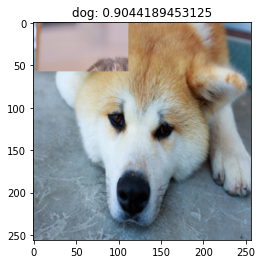

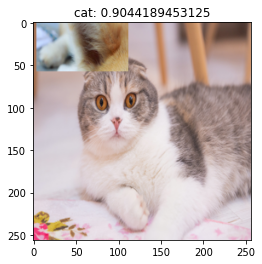

In [64]:
plt.imshow(inputs[0].permute(1, 2, 0).numpy()); plt.title("dog: "+str(lam)); plt.show()
plt.imshow(inputs[1].permute(1, 2, 0).numpy()); plt.title("cat: "+str(lam)); plt.show()